# COLUMN / BAR CHARTS AND GROUPED BARS

Bar charts -  a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. Can be vertical or horizontal. Can also be grouped. 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.cm as cmp
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxl', grid=False)
warnings.filterwarnings('ignore')

In [3]:
olympics = pd.read_csv('./Olympics-Dataset.csv')

Bar chart analysis: Observing the count of Hungarian wrestlers over the games

In [11]:
wrestling = olympics.query('Sport == "Wrestling" and Team == "Hungary"')

In [34]:
wrestling_count = wrestling.groupby('Games').count()['ID'].to_frame()

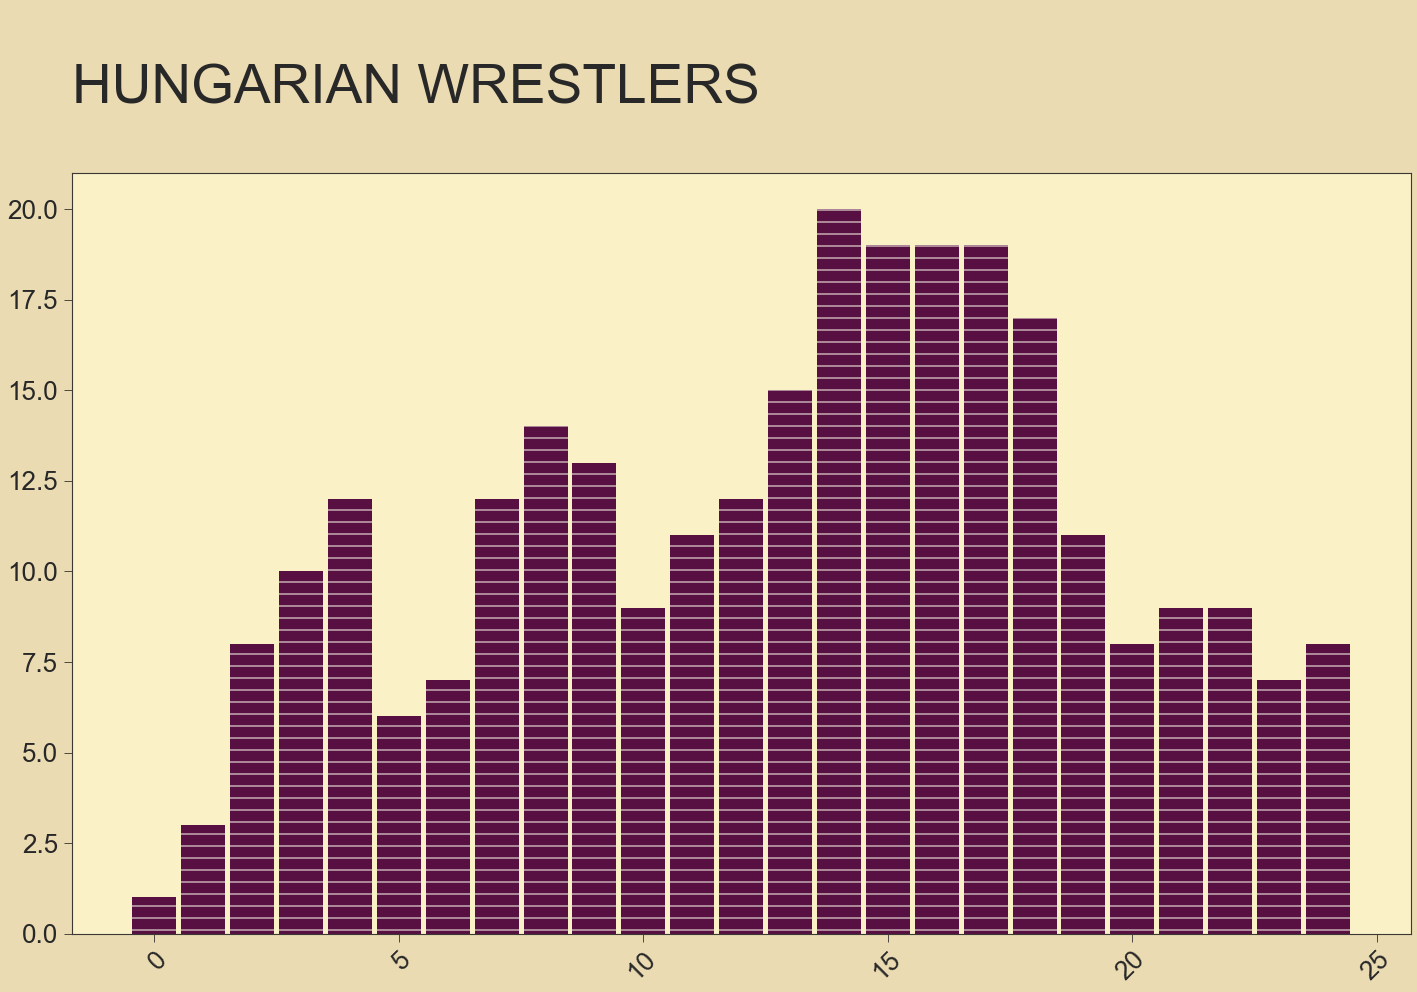

In [159]:
fig, ax = plt.subplots(1, figsize=(24,14))
plt.bar(wrestling_count.index, wrestling_count.ID, width=0.9, color='xkcd:plum', edgecolor='ivory', linewidth=0, hatch='-')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('\nHUNGARIAN WRESTLERS\n', fontsize=55, loc='left')
ax.tick_params(axis='x', size=8, labelsize=26)
ax.tick_params(axis='y', size=8, labelsize=26)
fig.show()

Same thing, in plotly:


In [35]:
wrestling_count.reset_index(level=0, inplace=True)

In [36]:
wrestling_count[:2]

,Games,ID
0,1896 Summer,1
1,1906 Summer,3


In [47]:
fig = px.bar(
    wrestling_count,
    x='Games',
    y='ID',
    labels={'index':'Games'}, 
    title='HUNGARIAN WRESTLERS',
    text="ID", 
    color="ID",
    template = "plotly_dark",
)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Horizontal bars: 


In [48]:
winter_games = olympics.query('Season == "Winter"')

Analysis: Observing the age count of gold medalists in the freestyle skiing event, during the winter games.

In [50]:
winter_games_gold_fs = winter_games.query('Medal == "Gold" and Sport == "Freestyle Skiing"')

In [67]:
winter_games_gold_fs.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

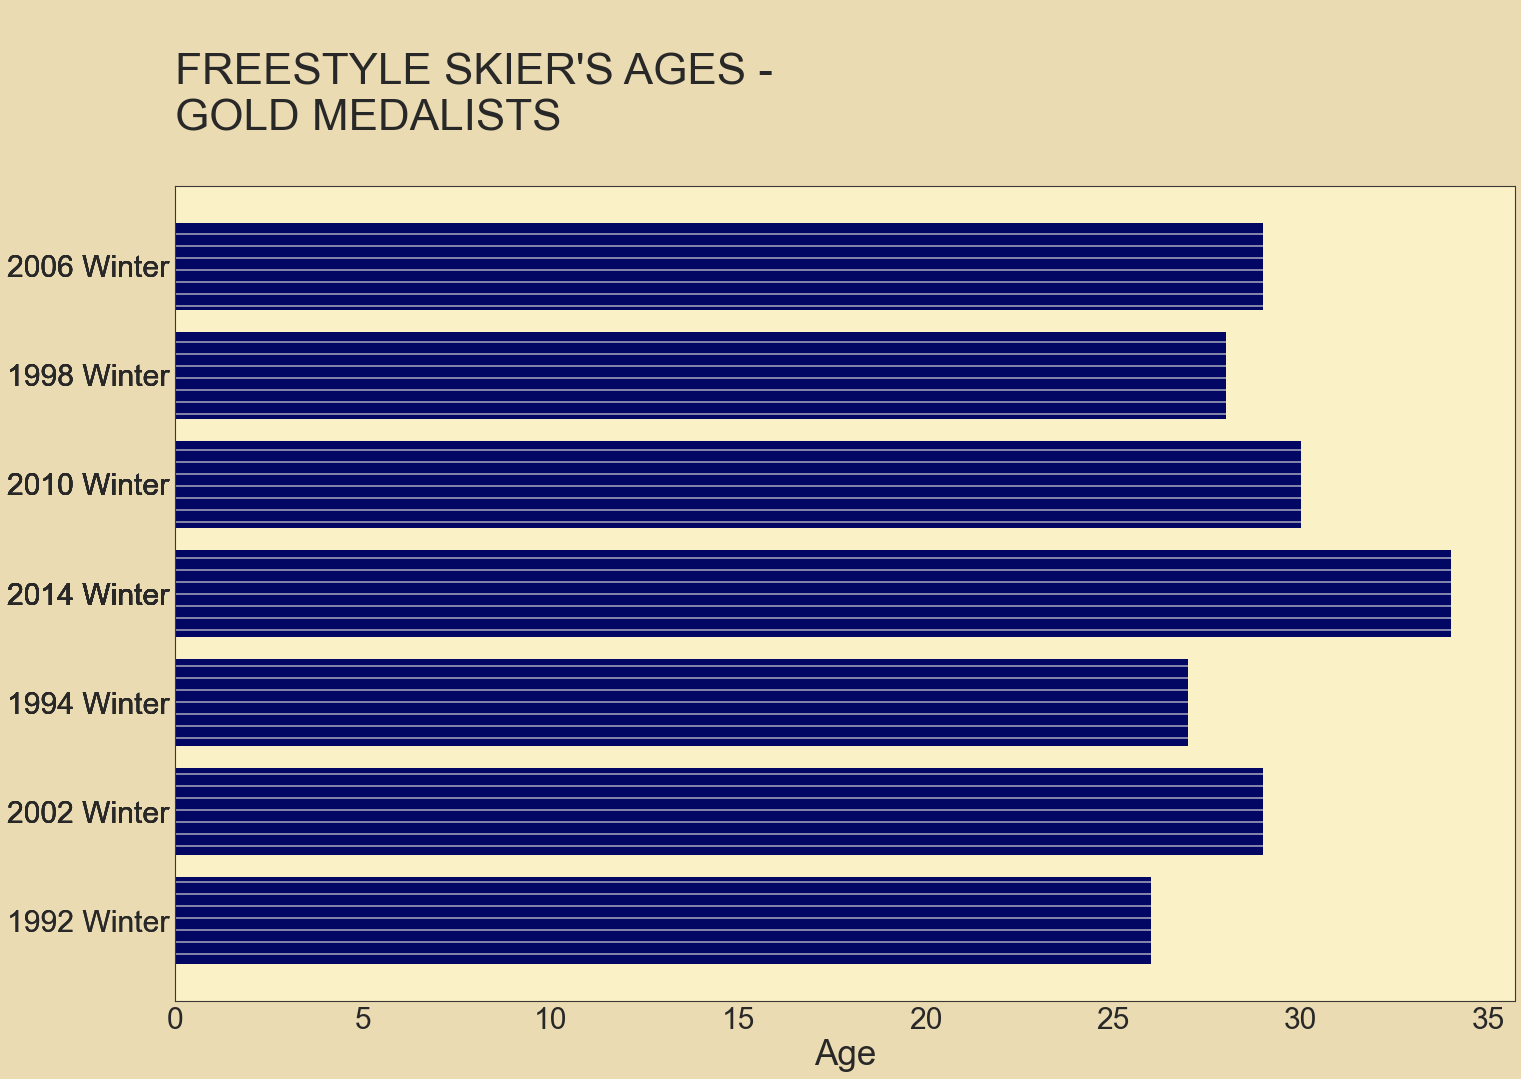

In [160]:
y = np.array(winter_games_gold_fs['Games'])
x = np.array(winter_games_gold_fs['Age'])

fig, ax = plt.subplots(1, figsize=(24,15))
ax.barh(y, x, color='xkcd:darkblue', edgecolor='ivory', linewidth=0, hatch='-')
ax.set_yticks(y, labels=winter_games_gold_fs['Games'], fontsize=20)
ax.invert_yaxis() 
ax.set_xlabel('Age', fontsize=35)
ax.set_title("\nFREESTYLE SKIER'S AGES -\nGOLD MEDALISTS\n", fontsize=44, loc='left')
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
plt.show()

Same thing, in plotly:


In [76]:
fig = px.bar(
    winter_games_gold_fs,
    x='Age',
    y='Games', 
    title="FREESTYLE SKIER'S AGES - GOLD MEDALISTS",
    text="Age", 
    color="Age",
    color_continuous_scale='Bluered_r',
    template = "plotly_dark",
    orientation="h"
)

fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)
fig.show()

Grouped Bar Charts:


Analysis: Male and Female **French** Gymnists over the summer games

In [134]:
gymnists_fn = olympics.query('Team == "France" and Sport == "Gymnastics" and Year > 1980')
gymnists_fn = gymnists_fn.sort_values(by=['Year'])

In [135]:
gymnists_fn_m = gymnists_fn.loc[gymnists_fn['Sex'] == "M"].groupby('Games').count()['ID'].to_frame()
gymnists_fn_w = gymnists_fn.loc[gymnists_fn['Sex'] == "F"].groupby('Games').count()['ID'].to_frame()

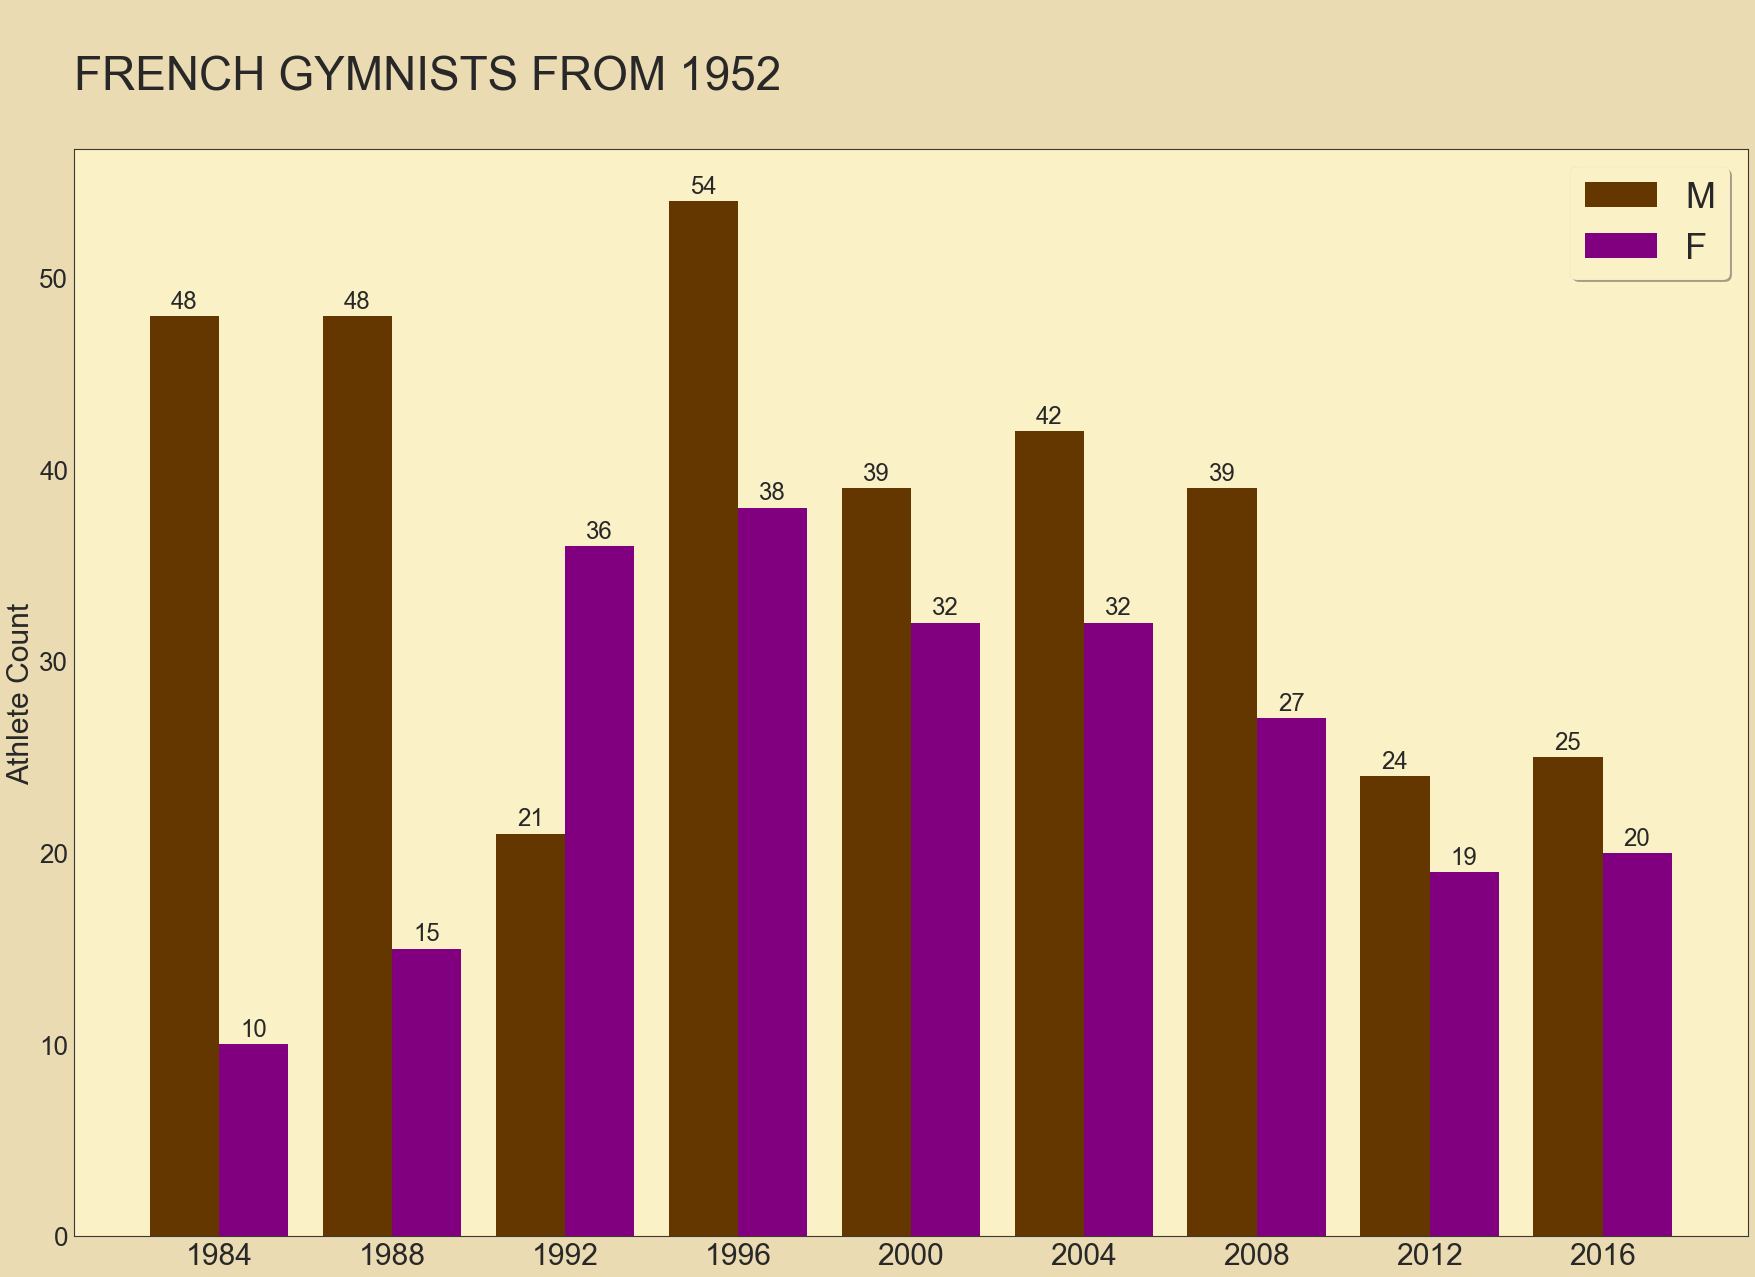

In [162]:
fig, ax = plt.subplots(figsize = (30,20))
width = 0.4
labels = gymnists_fn.Year.unique()
label_locations = np.arange(len(gymnists_fn.Games.unique()))
y_m = np.array(gymnists_fn_m.ID)
y_w = np.array(gymnists_fn_w.ID)
semi_bar_m = ax.bar(label_locations-width/2, y_m, width, label="M", color='xkcd:brown')
semi_bar_w = ax.bar(label_locations+width/2, y_w, width, label="F", color='purple')

ax.set_ylabel('Athlete Count', fontsize=30)
ax.set_title('\nFRENCH GYMNISTS FROM 1952 \n', fontsize=46, loc='left')
ax.set_xticks(label_locations, labels, fontsize=30)
ax.tick_params(axis='y', labelsize=26)
ax.legend(prop={'size': 36},  shadow=True)

ax.bar_label(semi_bar_m, padding=3, fontsize=24)
ax.bar_label(semi_bar_w, padding=3, fontsize=24)

plt.show()

Plotly representation of the above:


In [163]:
# done with graph objects

fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y= y_m,
    name='Male',
    marker_color='saddlebrown'
))
fig.add_trace(go.Bar(
    x=labels,
    y=y_w,
    name='Female',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, font=dict(size=18), title="FRENCH GYMNISTS FROM 1952")
fig.show()